# Regression Modelling on House Prices

Author - Sushma G.

---

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
import xgboost as xgb
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')


from pandas import ExcelWriter
from math import sqrt
from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder


plt.style.use('bmh')


## Setting plotting configurations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
#plt.style.context('seaborn-talk')
plt.style.use(['tableau-colorblind10'])
#plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

C:\Users\shiva\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train = train_data.copy()
test = test_data.copy()

print(train_data.shape)
display(train_data.head(1))
display(train_data.info())
train_length = train_data.shape[0]


print(test_data.shape)
display(test_data.head(1))
display(test_data.info())

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

## Data fields

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### EDA

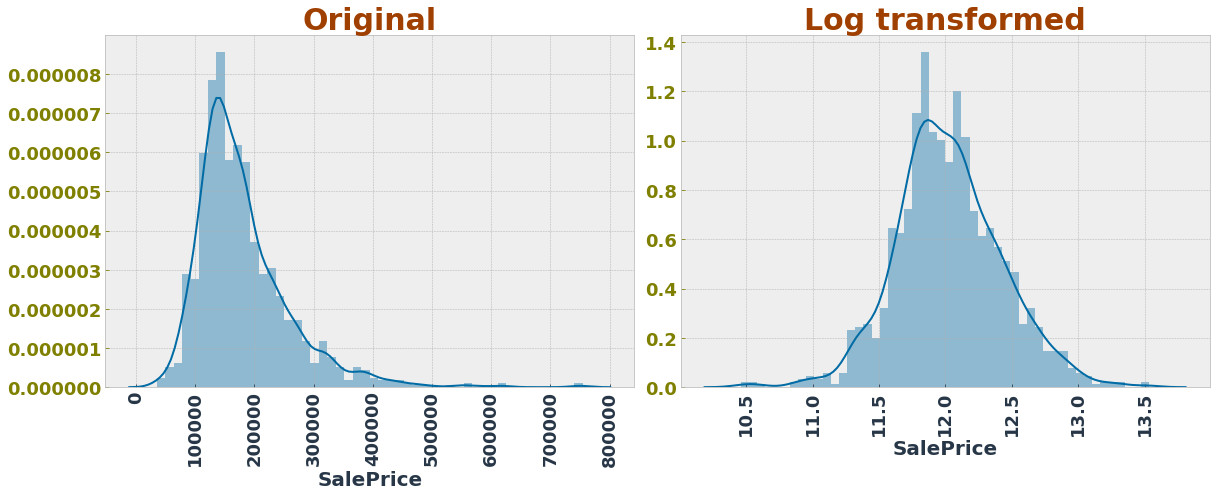

In [3]:
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
sns.distplot(train.SalePrice, bins=50)
plt.xticks(rotation = 90)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(train.SalePrice), bins=50)
plt.xticks(rotation = 90)
plt.title('Log transformed')

plt.tight_layout()

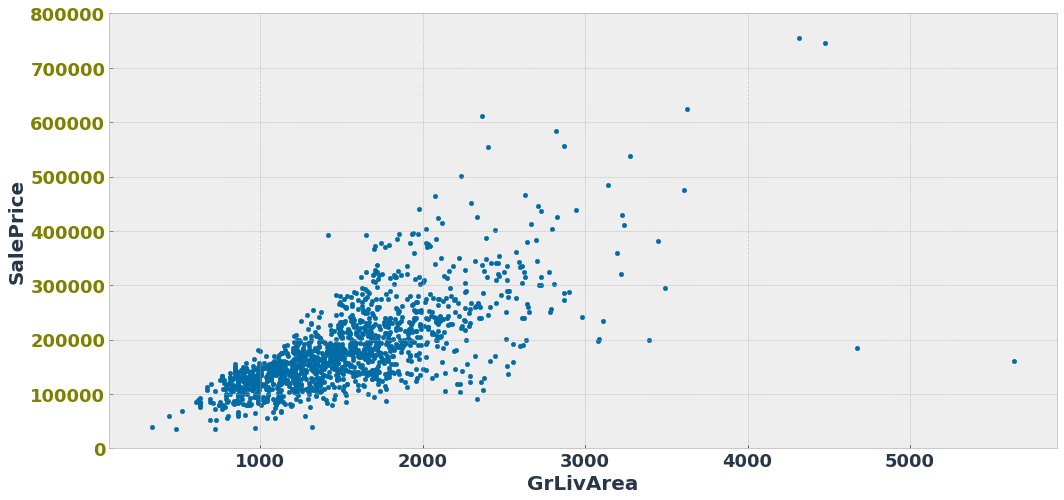

In [4]:
var = 'GrLivArea'
data = pd.concat([train["SalePrice"], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), figsize = (17,8))
plt.show()

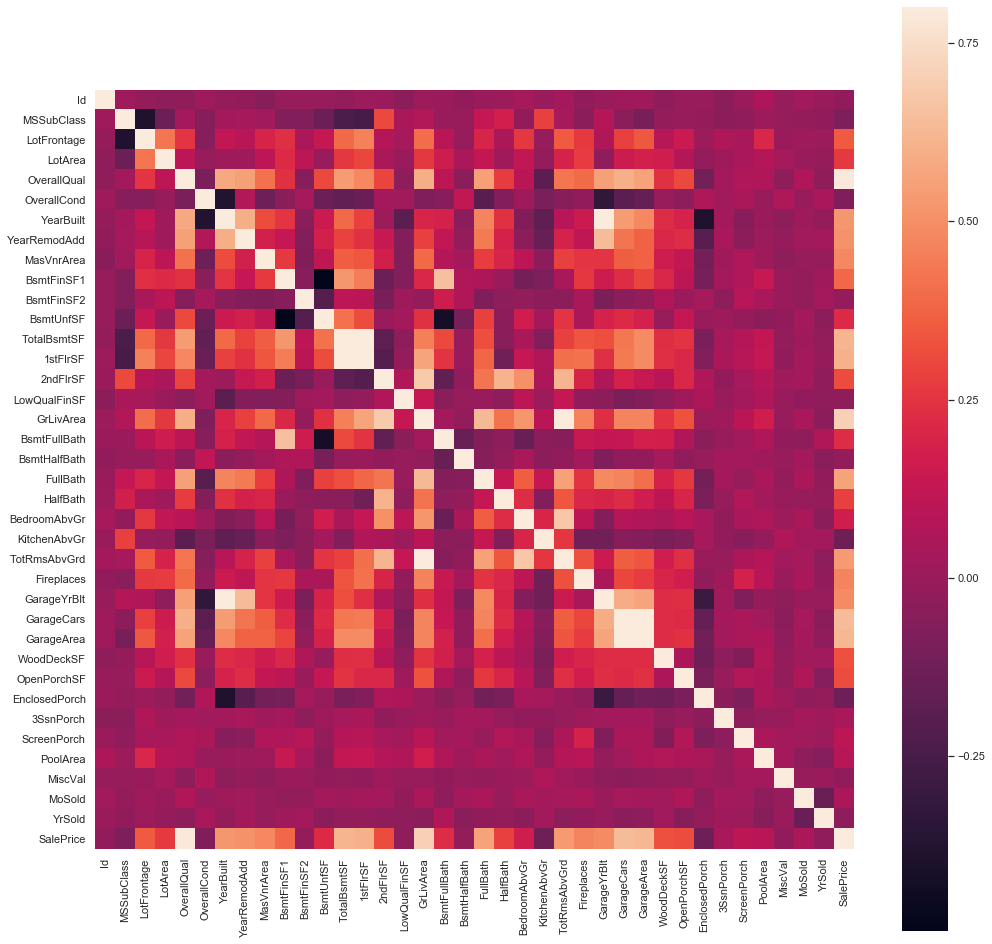

In [5]:
corr_matrix = train.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(17, 17))
f = sns.heatmap(corr_matrix, vmax=.8, square=True)

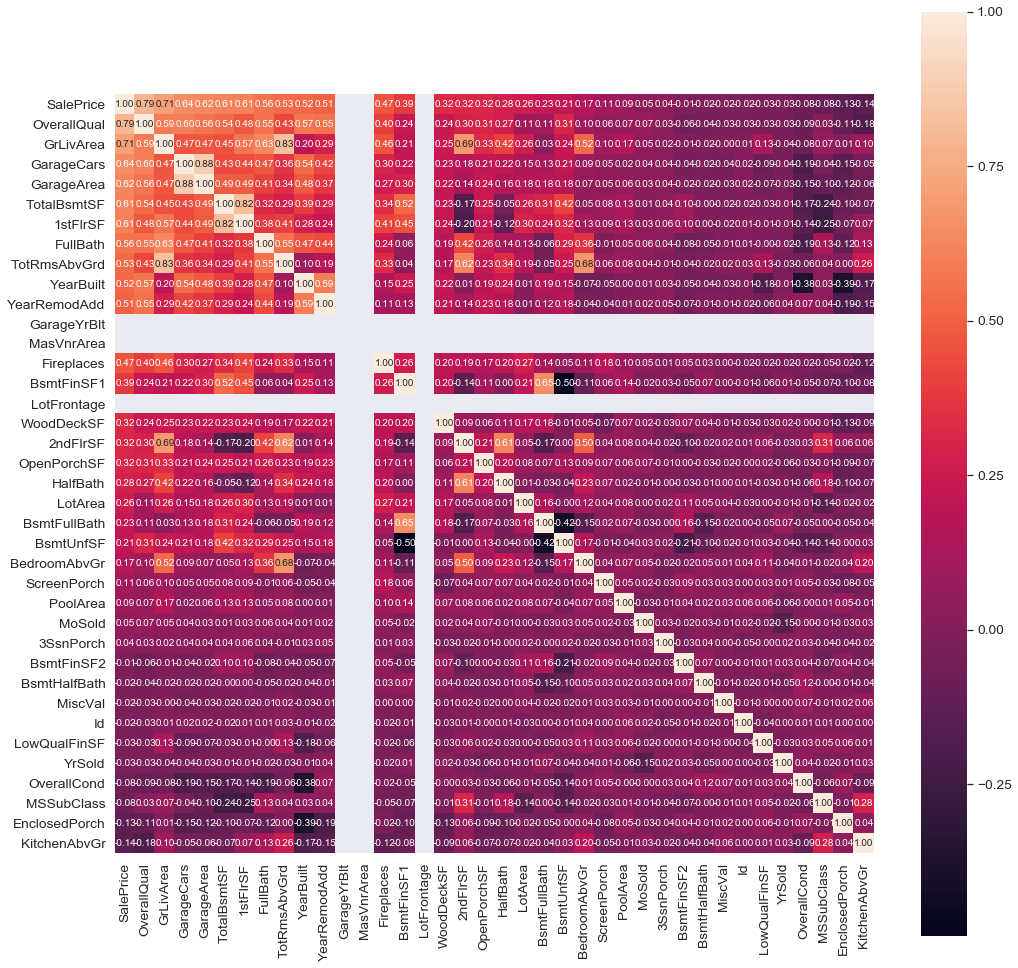

In [6]:
k = len(train.columns) #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(17, 17))
f = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


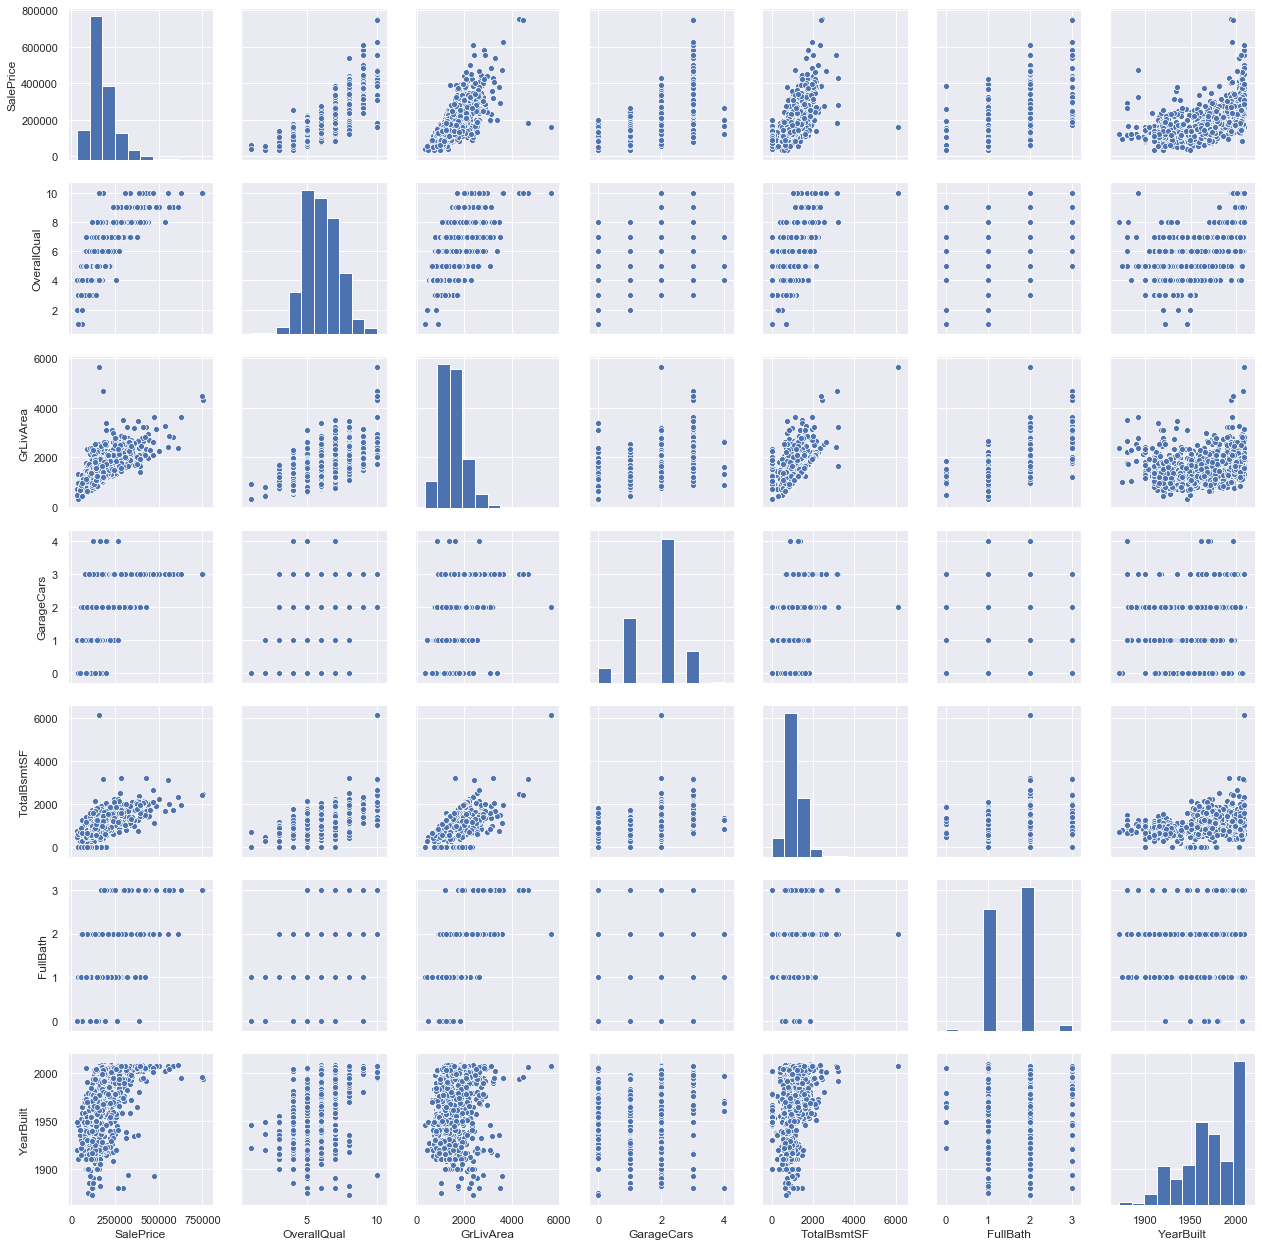

In [7]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

#### Missing Values Analysis

In [8]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageYrBlt,81,0.06
GarageCond,81,0.06
GarageType,81,0.06
GarageFinish,81,0.06


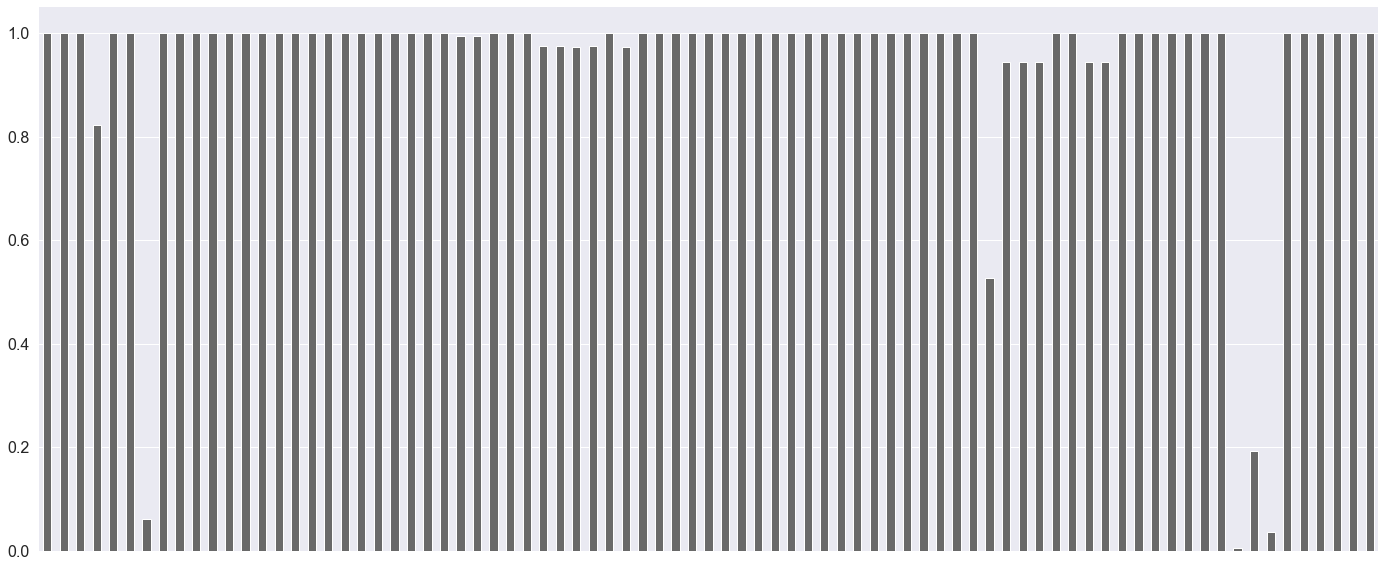

In [9]:
import missingno as msno
msno.bar(train)
plt.show()

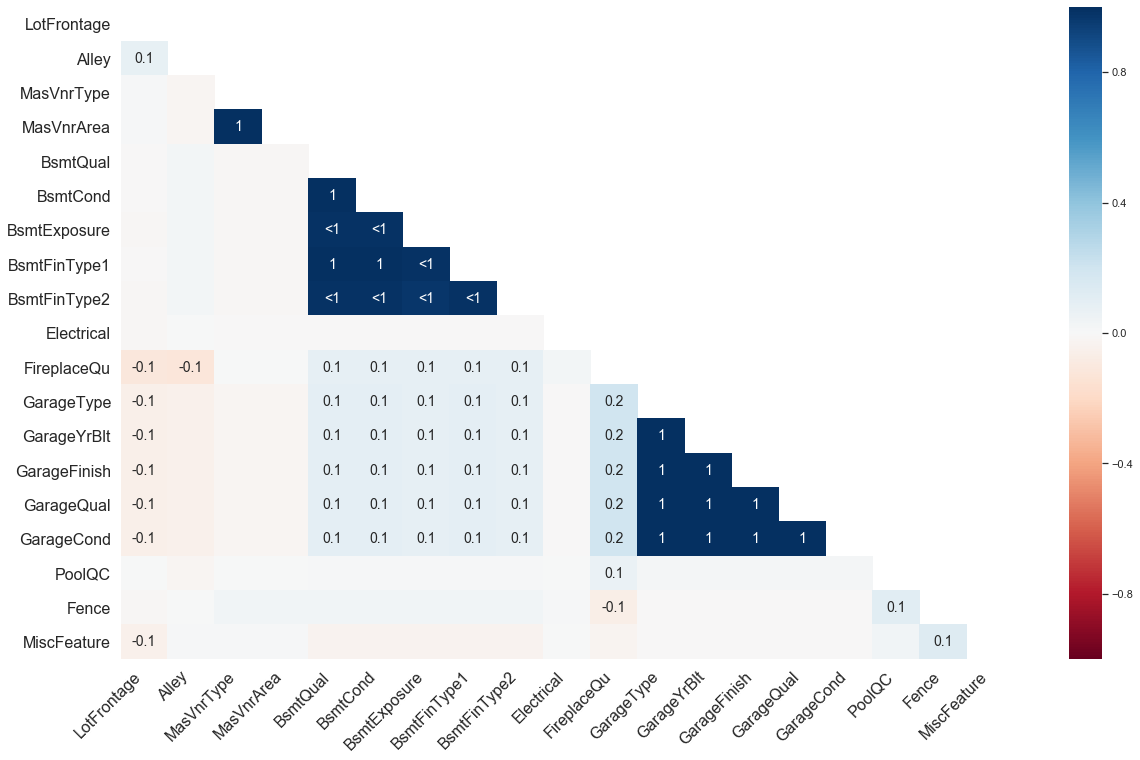

In [10]:
msno.heatmap(train)
plt.show()

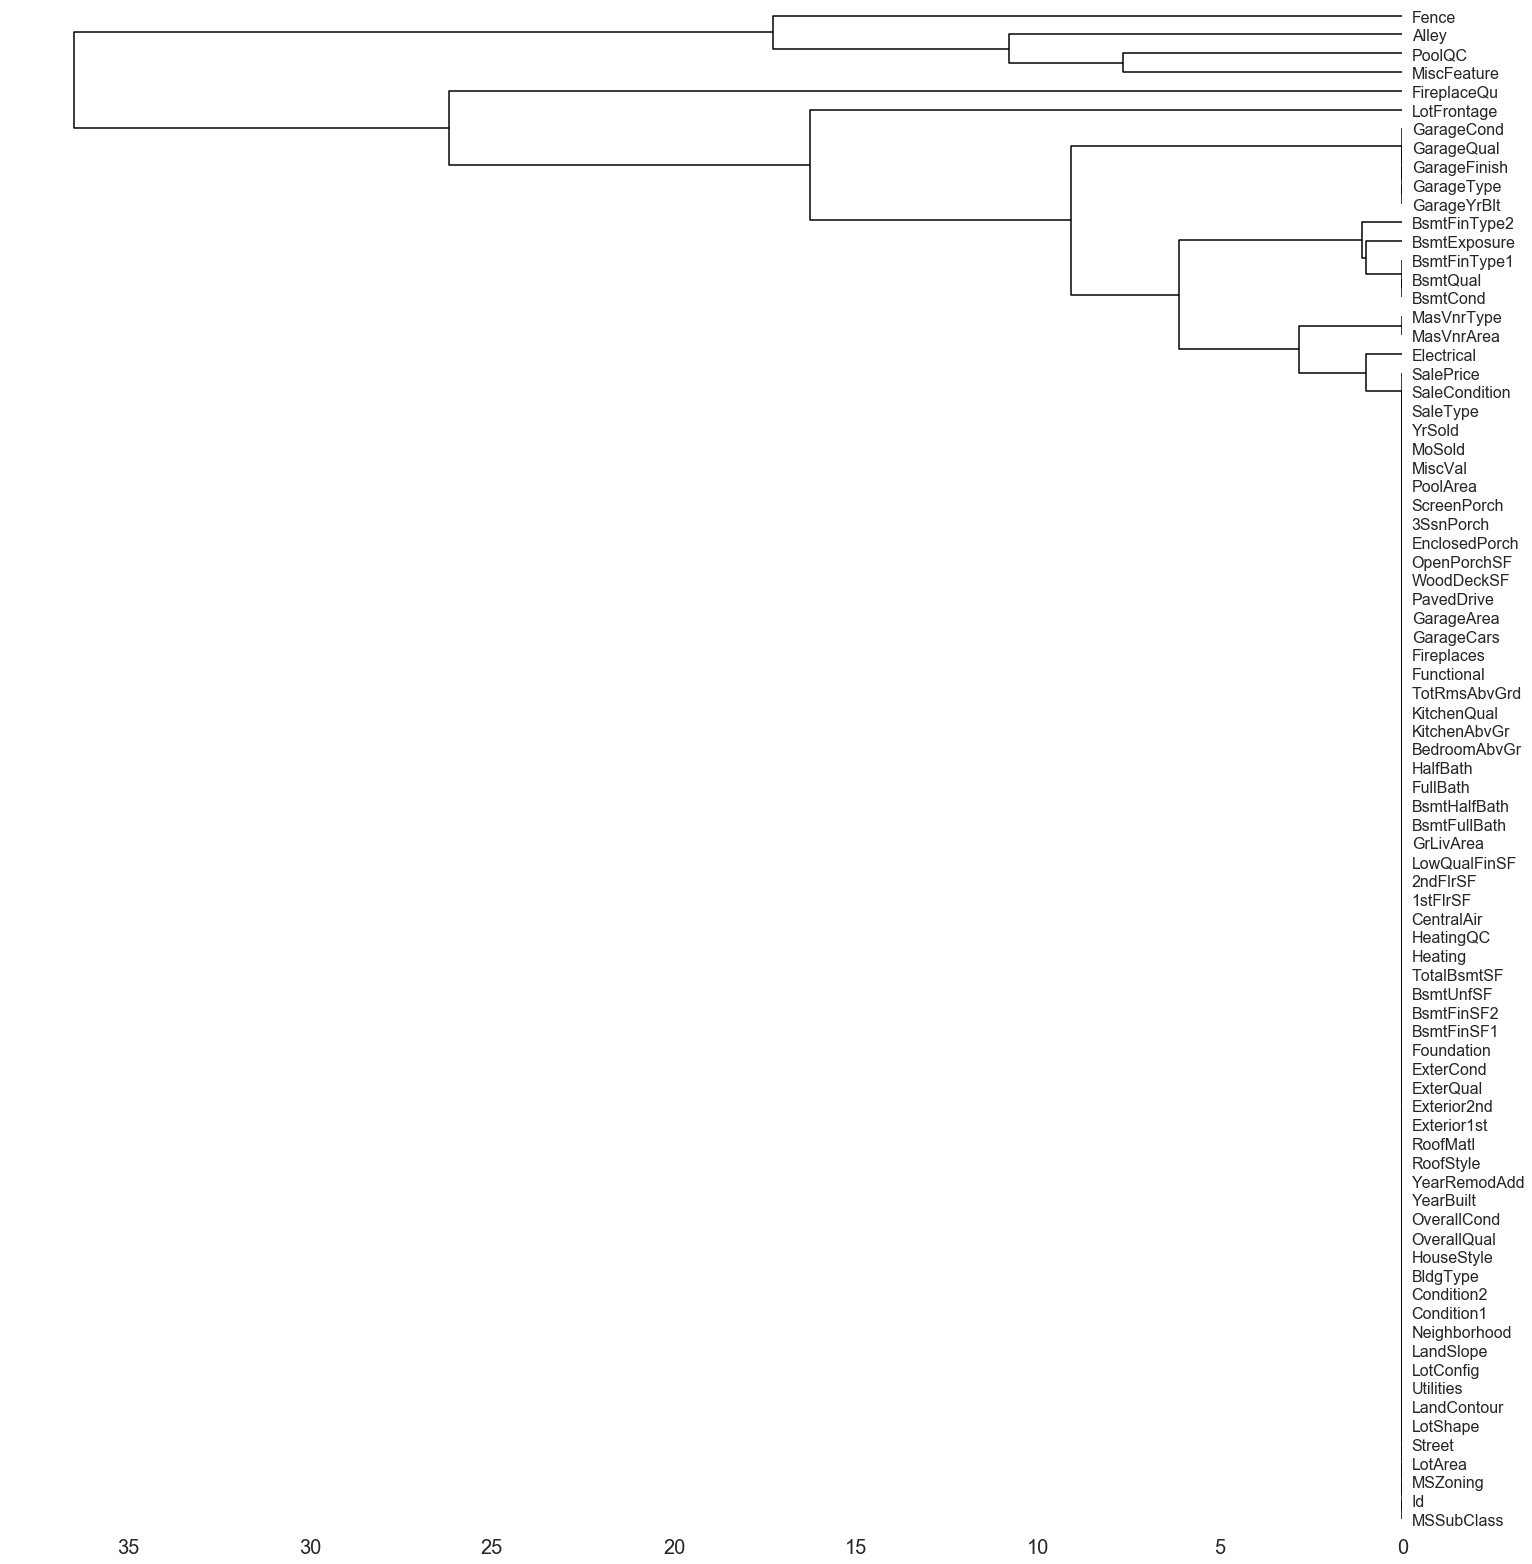

In [11]:
msno.dendrogram(train)
plt.show()

#### Data Preprocessing

* Remove skewenes of target feature

Skewness is the measure of the asymmetry of an ideally symmetric probability distribution and is given by the third standardized moment. In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution.

* Remove skewenes of numeric features is exists
* Handle missing values in categorical features
* Handle missing values in numerical features
* Feature selection

##### Target variable

In [12]:
target = train['SalePrice']
target_log = np.log1p(train['SalePrice'])

#### Concat train and test dataset in order for pre-processing

In order to apply transformations on data, we have to concatenate both datasets: train and test

In [13]:
# drop target variable from train dataset
train = train.drop(["SalePrice"], axis=1)

In [14]:
data = pd.concat([train, test], ignore_index=True)

## Split dataframe into numeric and categorical

Split dataframe into 2 with:
- categorical feature space
- numerical feature space

In [15]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [16]:
data_num.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.00,8450,7,5,2003,2003,196.00,706.00,0.00,150.00,856.00,856,854,0,1710,1.00,0.00,2,1,3,1,8,0,2003.00,2.00,548.00,0,61,0,0,0,0,0,2,2008


In [17]:
data_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.00,2919.00,2433.00,2919.00,2919.00,2919.00,2919.00,2919.00,2896.00,2918.00,2918.00,2918.00,2918.00,2919.00,2919.00,2919.00,2919.00,2917.00,2917.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2760.00,2918.00,2918.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,69.31,10168.11,6.09,5.56,1971.31,1984.26,102.20,441.42,49.58,560.77,1051.78,1159.58,336.48,4.69,1500.76,0.43,0.06,1.57,0.38,2.86,1.04,6.45,0.60,1978.11,1.77,472.87,93.71,47.49,23.10,2.60,16.06,2.25,50.83,6.21,2007.79
std,842.79,42.52,23.34,7887.00,1.41,1.11,30.29,20.89,179.33,455.61,169.21,439.54,440.77,392.36,428.70,46.40,506.05,0.52,0.25,0.55,0.50,0.82,0.21,1.57,0.65,25.57,0.76,215.39,126.53,67.58,64.24,25.19,56.18,35.66,567.40,2.71,1.31
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1895.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,730.50,20.00,59.00,7478.00,5.00,5.00,1953.50,1965.00,0.00,0.00,0.00,220.00,793.00,876.00,0.00,0.00,1126.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1960.00,1.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,1460.00,50.00,68.00,9453.00,6.00,5.00,1973.00,1993.00,0.00,368.50,0.00,467.00,989.50,1082.00,0.00,0.00,1444.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1979.00,2.00,480.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,2189.50,70.00,80.00,11570.00,7.00,6.00,2001.00,2004.00,164.00,733.00,0.00,805.50,1302.00,1387.50,704.00,0.00,1743.50,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,2919.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1526.00,2336.00,6110.00,5095.00,2065.00,1064.00,5642.00,3.00,2.00,4.00,2.00,8.00,3.00,15.00,4.00,2207.00,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00


In [18]:
data_cat.head(1)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Reduce skewness for numeric features

In [19]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

In [20]:
data_num_skew

MSSubClass       1.38
LotFrontage      1.50
LotArea         12.82
MasVnrArea       2.60
BsmtFinSF1       1.42
BsmtFinSF2       4.15
BsmtUnfSF        0.92
TotalBsmtSF      1.16
1stFlrSF         1.47
2ndFlrSF         0.86
LowQualFinSF    12.09
GrLivArea        1.27
BsmtHalfBath     3.93
KitchenAbvGr     4.30
TotRmsAbvGrd     0.76
WoodDeckSF       1.84
OpenPorchSF      2.54
EnclosedPorch    4.00
3SsnPorch       11.38
ScreenPorch      3.95
PoolArea        16.90
MiscVal         21.95
dtype: float64

#### Missing values


#### Handling missing values in numerical columns

In [21]:
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

#### Handling missing values in categorical columns

In [22]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: BsmtQual
droping column: BsmtCond
droping column: BsmtExposure
droping column: BsmtFinType1
droping column: BsmtFinType2
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [23]:
data_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [24]:
data_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,3.82,246.58,9.09,6.09,5.56,1971.31,1984.26,13.58,4.73,1.18,6.13,7.23,7.00,2.83,0.08,7.26,1.43,1.04,1.57,0.38,2.86,0.71,1.99,0.60,1949.89,2.27,473.21,2.45,2.33,0.76,0.07,0.45,0.03,0.23,6.21,2007.79
std,842.79,0.69,542.42,0.51,1.41,1.11,30.29,20.89,128.95,27.11,27.08,26.98,26.92,0.32,3.28,0.66,0.32,38.20,38.21,0.55,0.50,0.82,0.09,0.21,0.65,120.20,27.00,216.13,2.59,2.15,1.77,0.59,1.46,0.41,1.24,2.71,1.31
min,1.00,3.04,3.09,7.17,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,5.81,0.00,0.00,5.81,0.00,0.00,0.00,0.00,0.00,0.00,1.10,0.00,1460.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,730.50,3.04,4.11,8.92,5.00,5.00,1953.50,1965.00,0.00,0.00,0.00,5.40,6.68,6.78,0.00,0.00,7.03,0.00,0.00,1.00,0.00,2.00,0.69,1.79,0.00,1957.00,1.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,1460.00,3.93,4.30,9.15,6.00,5.00,1973.00,1993.00,0.00,5.91,0.00,6.15,6.90,6.99,0.00,0.00,7.28,0.00,0.00,2.00,0.00,3.00,0.69,1.95,1.00,1977.00,2.00,480.00,0.00,3.30,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,2189.50,4.26,4.56,9.36,7.00,6.00,2001.00,2004.00,5.14,6.60,0.00,6.69,7.17,7.24,6.56,0.00,7.46,1.00,0.00,2.00,1.00,3.00,0.69,2.08,1.00,2001.00,2.00,576.00,5.13,4.26,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,2919.00,5.25,1460.00,12.28,10.00,9.00,2010.00,2010.00,1460.00,1460.00,1460.00,1460.00,1460.00,8.54,7.63,6.97,8.64,1460.00,1460.00,4.00,2.00,8.00,1.39,2.77,4.00,2207.00,1460.00,1488.00,7.26,6.61,6.92,6.23,6.36,6.69,9.74,12.00,2010.00


In [25]:
data_cat_dummies = pd.get_dummies(data_cat)

#### Merge and save

In [26]:
data_num.shape

(2919, 37)

In [27]:
data_cat.shape

(2919, 43)

In [28]:
# data = pd.concat([data_num, data_cat], axis=1)
data = pd.concat([data_num, data_cat_dummies], axis=1)

In [29]:
train = data.iloc[:len(train)-1]
train = train.join(target_log)

test = data.iloc[len(train)+1:]

In [30]:
train.to_pickle("data/train.pkl")
test.to_pickle("data/test.pkl")

#### Create matrixes

In [31]:
# remove Id and target variable
X_train = train[train.columns.values[1:-1]]
y_train = train[train.columns.values[-1]]

# remove Id
X_test = test[test.columns.values[1:]]

### RandomForest

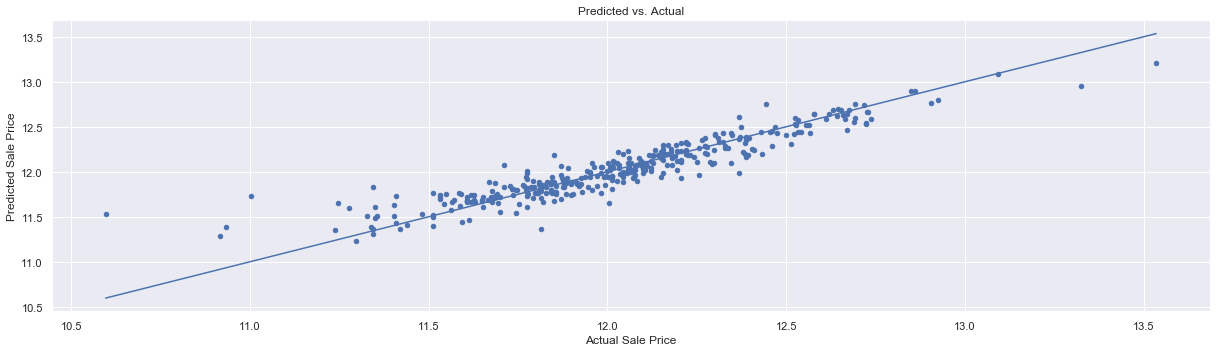

In [48]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

model_rf.fit(X_train1, y_train1)
rf_pred = model_rf.predict(X_test1)

plt.figure(figsize=(17, 5))
plt.scatter(y_test1, rf_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
plt.show()

In [49]:
model_rf.fit(X_train, y_train)
rf_pred_log = model_rf.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(rf_pred_log)})
submission.to_csv("outputs/sub-rf.csv", index=False)
submission.head()

,Id,SalePrice
1459,1460,149831.50
1460,1461,126343.15
1461,1462,154035.96
1462,1463,178148.72
1463,1464,181872.28


## Linear regression with regularisation - RIDGE (LB: 2.64792)

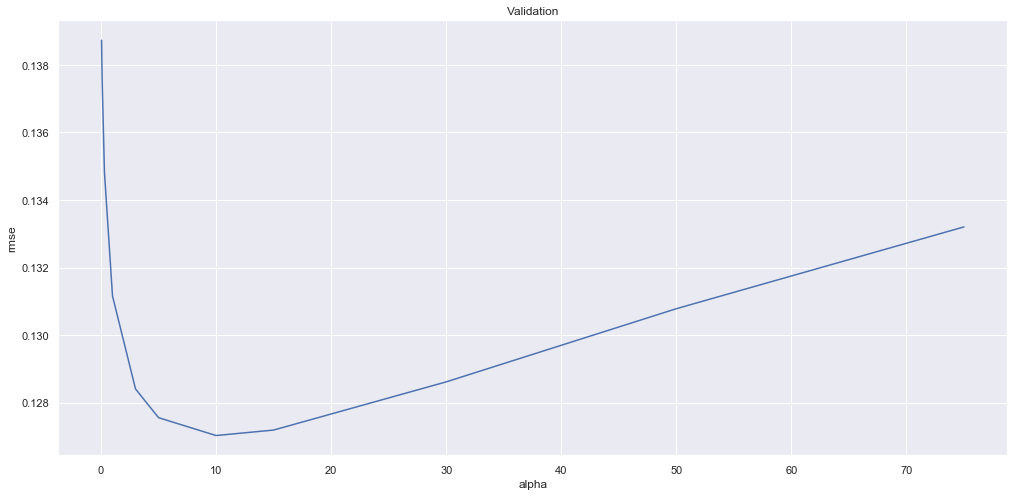

In [58]:
from sklearn.linear_model import Ridge, RidgeCV
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_rige = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation", figsize = (17,8))
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()
# looks like the smallest error is with alpha = 10 

In [59]:
# let train again model with alpha = 10
model_ridge = Ridge(alpha = 10).fit(X_train, y_train)
rmse_cv(model_ridge).mean()

0.12702901755662166

In [61]:
y_test_pred_log = model_ridge.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(y_test_pred_log)})
submission.to_csv("outputs/sub-ridge.csv", index=False)
submission.head()

,Id,SalePrice
1459,1460,140847.06
1460,1461,118515.07
1461,1462,152068.69
1462,1463,181165.30
1463,1464,196793.72


## Linear regression with regularisation - LASSO

In [62]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()

0.12282518234196027

In [64]:
lasso_pred_log = model_lasso.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(lasso_pred_log)})
submission.to_csv("outputs/sub-lasso.csv", index=False)
submission.head()

,Id,SalePrice
1459,1460,140919.45
1460,1461,119544.79
1461,1462,150981.57
1462,1463,180470.93
1463,1464,197028.32


## Xgboost

In [66]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

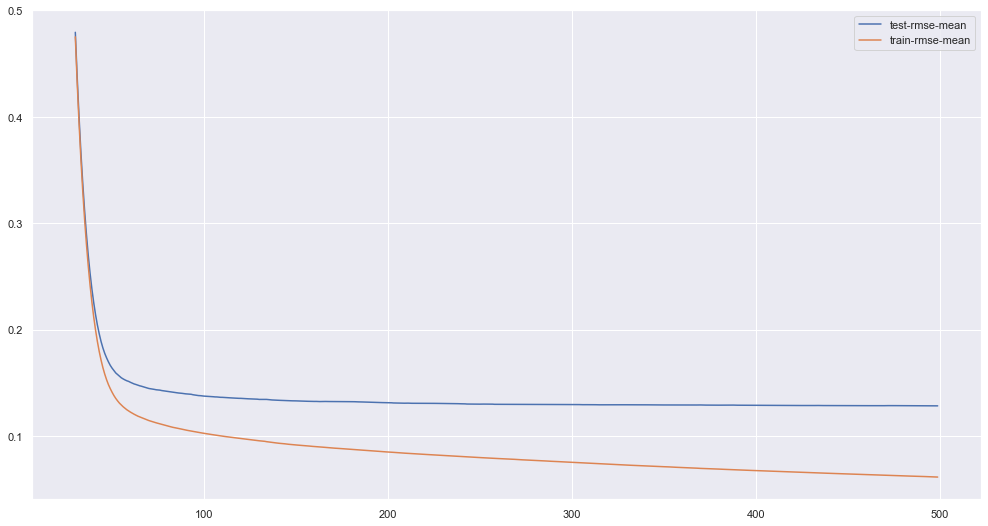

In [67]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot(figsize = (17,9))

In [68]:
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=2, learning_rate=0.01) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)
xgb_preds_log = model_xgb.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(xgb_preds_log)})
submission.to_csv("outputs/sub-xgb-30_03_2017.csv", index=False)
submission.head()

,Id,SalePrice
1459,1460,129860.32
1460,1461,114410.00
1461,1462,142210.05
1462,1463,162081.39
1463,1464,164325.44


## GradientBoosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model_gbm = GradientBoostingRegressor(**params)
model_gbm.fit(X_train, y_train)

rmse_cv(model_gbm).mean()

gbm_preds_log = model_gbm.predict(X_test)
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':np.expm1(gbm_preds_log)})
submission.to_csv("outputs/sub-gbm.csv", index=False)
submission.head()

,Id,SalePrice
1459,1460,153105.28
1460,1461,126719.83
1461,1462,154242.32
1462,1463,182604.37
1463,1464,171529.68


## Save models

In [71]:
import pickle
pickle.dump(model_rf, open('models/model-rf.pkl', 'wb'))
pickle.dump(model_xgb, open('models/model-xgb.pkl', 'wb'))
pickle.dump(model_gbm, open('models/model-gbm.pkl', 'wb'))
pickle.dump(model_lasso, open('models/model-lasso.pkl', 'wb'))
pickle.dump(model_ridge, open('models/model-ridge.pkl', 'wb'))

## Advanced Modelling

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
#Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder


import xgboost as xgb

## Machine Learning Models

We will compare a number of models with two strategies.

1. Using all variables and 2. After removing the correlated features

In [33]:
from sklearn.preprocessing import MinMaxScaler
X_sub = X_test.copy()

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle = False,  test_size = 0.10, random_state=123)

# scale the features to help model learn the data in a better way
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train, columns=X_sub.columns)
X_test = pd.DataFrame(X_test, columns=X_sub.columns)

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import plot_partial_dependence

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.exceptions import ConvergenceWarning


# Define the helper functions for training the model togethers, this function will get the cv score, which means RMSE score of the models

def cv_score(df_train, y_train, kfolds, pipeline, imp_coef=False):
    oof = np.zeros(len(df_train))
    train = df_train.copy()
    
    feat_df = pd.DataFrame()
    
    for n_fold, (train_index, test_index) in enumerate(kfolds.split(train.values)):
            
        trn_data = train.iloc[train_index][:]
        val_data = train.iloc[test_index][:]
        
        trn_target = y_train.iloc[train_index].values.ravel()
        val_target = y_train.iloc[test_index].values.ravel()
        
        pipeline.fit(trn_data, trn_target)

        oof[test_index] = pipeline.predict(val_data).ravel()

        if imp_coef:
            try:
                fold_df = get_coef(pipeline)
            except AttributeError:
                fold_df = get_feature_importance(pipeline)
                
            fold_df['fold'] = n_fold + 1
            feat_df = pd.concat([feat_df, fold_df], axis=0)
       
    if imp_coef:
        feat_df = feat_df.groupby('feat')['score'].agg(['mean', 'std'])
        feat_df['abs_sco'] = (abs(feat_df['mean']))
        feat_df = feat_df.sort_values(by=['abs_sco'],ascending=False)
        del feat_df['abs_sco']
        return oof, feat_df
    else:    
        return oof

# This function can find the best parameters for the models
def grid_search(data, target, estimator, param_grid, scoring, cv, random=False):
    
    if random:
        grid = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, cv=cv, scoring=scoring, 
                                  n_iter=random, n_jobs=-1, random_state=434, iid=False)
    else:
        grid = GridSearchCV(estimator=estimator, param_grid=param_grid, 
                            cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    
    pd.options.mode.chained_assignment = None  # turn on and off a warning of pandas
    tmp = data.copy()
    grid = grid.fit(tmp, target)
    pd.options.mode.chained_assignment = 'warn'
    
    result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', 
                                                        ascending=False).reset_index()
    
    del result['params']
    times = [col for col in result.columns if col.endswith('_time')]
    params = [col for col in result.columns if col.startswith('param_')]
    
    result = result[params + ['mean_test_score', 'std_test_score'] + times]
    
    return result, grid.best_params_, grid.best_estimator_

# get the coefficients of the features
def get_coef(pipe):
    imp = pipe.steps[-1][1].coef_.tolist()
    feats = pipe.steps[-2][1].get_feature_names()
    result = pd.DataFrame({'feat':feats,'score':imp})
    result['abs_res'] = abs(result['score'])
    result = result.sort_values(by=['abs_res'],ascending=False)
    del result['abs_res']
    return result

# Get the feature importance

def get_feature_importance(pipe):
    imp = pipe.steps[-1][1].feature_importances_.tolist() #it's a pipeline
    feats = pipe.steps[-2][1].get_feature_names()
    result = pd.DataFrame({'feat':feats,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result


def _plot_diagonal(ax):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    low = min(xmin, xmax)
    high = max(xmin, xmax)
    scl = (high - low) / 100
    
    line = pd.DataFrame({'x': np.arange(low, high ,scl), # small hack for a diagonal line
                         'y': np.arange(low, high ,scl)})
    ax.plot(line.x, line.y, color='black', linestyle='--')
    
    return ax


def plot_predictions(data, true_label, pred_label, feature=None, hue=None, legend=False):
    
    tmp = data.copy()
    tmp['Prediction'] = pred_label
    tmp['True Label'] = true_label
    tmp['Residual'] = tmp['True Label'] - tmp['Prediction']
    
    diag = False
    alpha = 0.7
    label = ''
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    
    if feature is None:
        feature = 'True Label'
        diag = True
    else:
        legend = 'full'
        sns.scatterplot(x=feature, y='True Label', data=tmp, ax=ax[0], label='True',
                         hue=hue, legend=legend, alpha=alpha)
        label = 'Predicted'
        alpha = 0.4

    sns.scatterplot(x=feature, y='Prediction', data=tmp, ax=ax[0], label=label,
                         hue=hue, legend=legend, alpha=alpha)
    if diag:
        ax[0] = _plot_diagonal(ax[0])
    
    sns.scatterplot(x=feature, y='Residual', data=tmp, ax=ax[1], 
                    hue=hue, legend=legend, alpha=0.7)
    ax[1].axhline(y=0, color='r', linestyle='--')
    
    ax[0].set_title(f'{feature} vs Predictions')
    ax[1].set_title(f'{feature} vs Residuals')
models = [('Linear Regression (L2)', Ridge(alpha = 0.9)), ('Decision Tree Regression', DecisionTreeRegressor(max_depth = 7)), 
          ('Random Forest Regression', RandomForestRegressor(max_depth = 9, n_estimators = 500)),
          ('Extra Trees Regression', ExtraTreesRegressor(n_estimators=100)), 
          ('Support Vector Regression', SVR(kernel = 'rbf')), 
          ('KNN Regression', KNeighborsRegressor()),
          ('Xgboost Regression', xgb.XGBRegressor(n_estimators=100, objective='reg:squarederror')), 
          ('Light Gradient Boosting Regressor', lgb.LGBMRegressor(n_estimators=100))]

mod_name = []
rmse_train = []
rmse_test = []
mae_train = []
mae_test = []

folds = KFold(5, shuffle=True, random_state=541)

Linear Regression (L2)
	Train set RMSE: 0.1364
	Test set RMSE: 0.1343


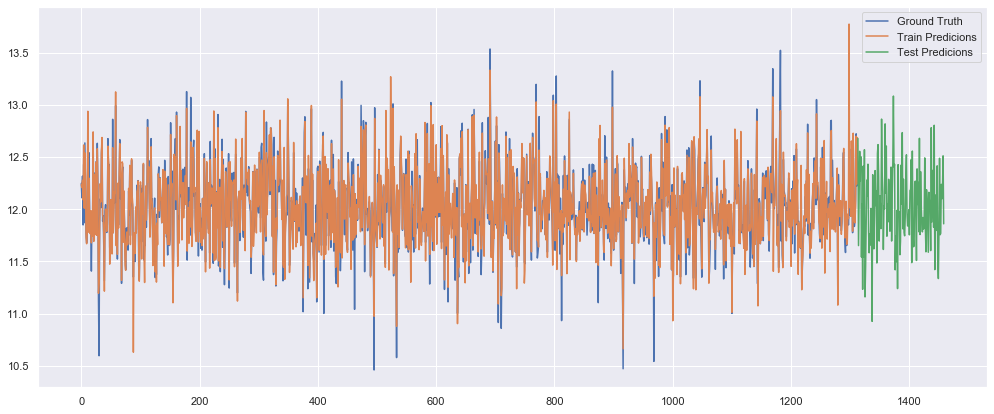

________________________________________


Decision Tree Regression
	Train set RMSE: 0.1987
	Test set RMSE: 0.1971


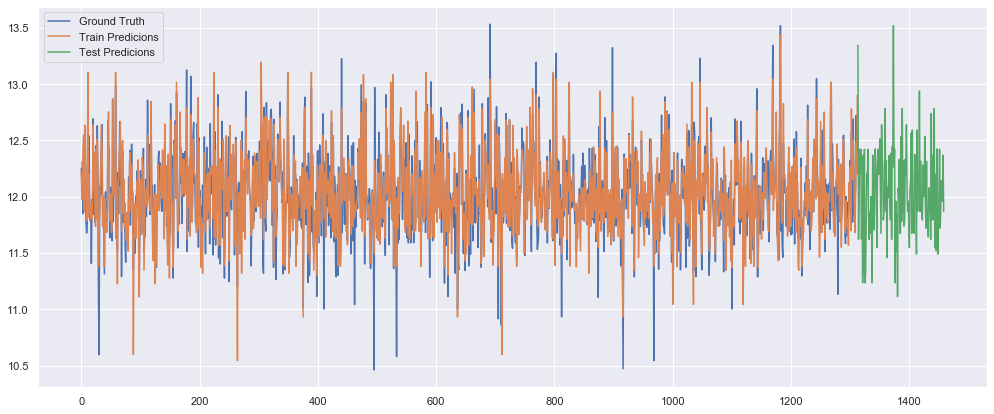

________________________________________


Random Forest Regression
	Train set RMSE: 0.1469
	Test set RMSE: 0.1524


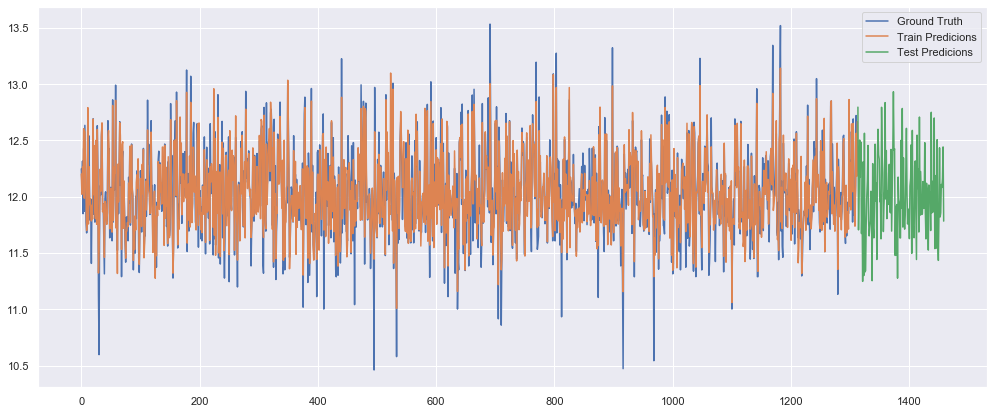

________________________________________


Extra Trees Regression
	Train set RMSE: 0.1436
	Test set RMSE: 0.1555


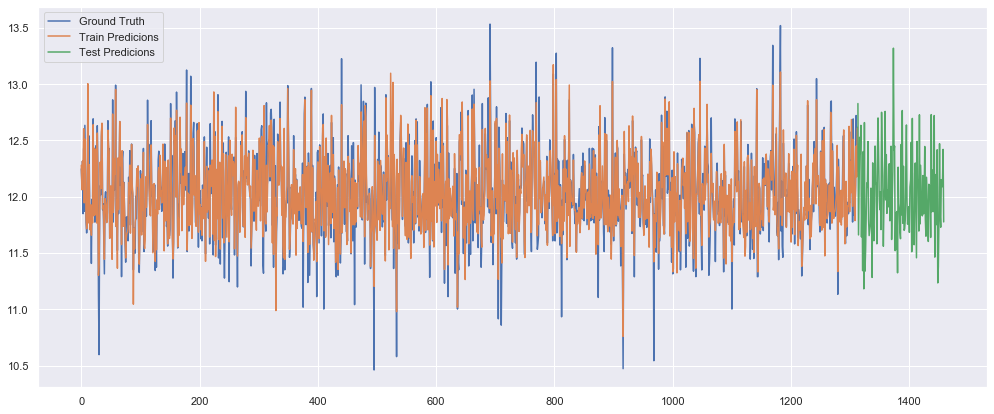

________________________________________


Support Vector Regression
	Train set RMSE: 0.1443
	Test set RMSE: 0.1349


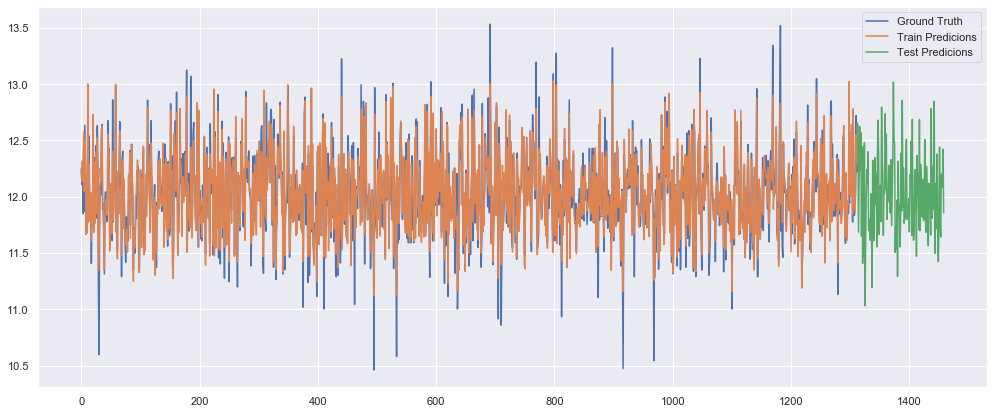

________________________________________


KNN Regression
	Train set RMSE: 0.2063
	Test set RMSE: 0.208


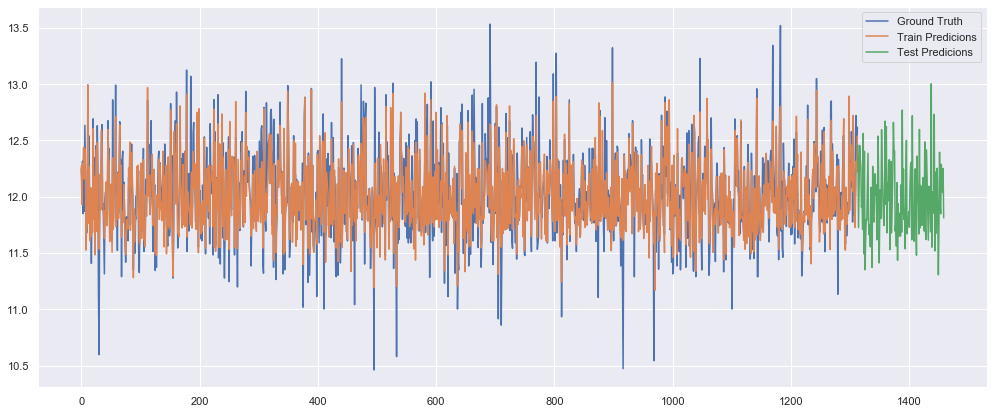

________________________________________


Xgboost Regression
	Train set RMSE: 0.1383
	Test set RMSE: 0.1483


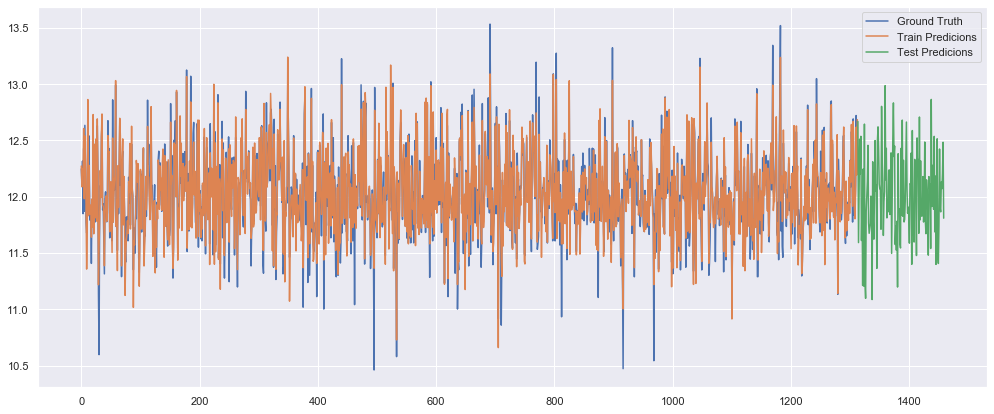

________________________________________


Light Gradient Boosting Regressor
	Train set RMSE: 0.1329
	Test set RMSE: 0.1444


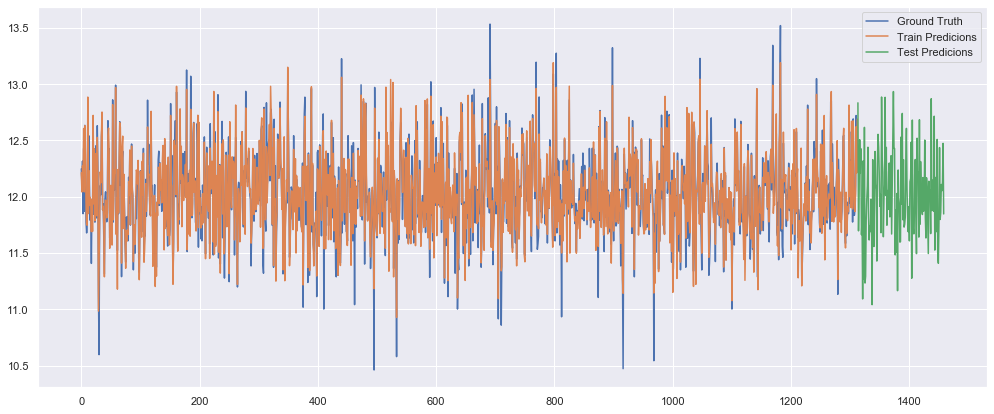

________________________________________




,model_name,rmse_train,rmse_test
0,Linear Regression (L2),0.02,0.02
1,Decision Tree Regression,0.04,0.04
2,Random Forest Regression,0.02,0.02
3,Extra Trees Regression,0.02,0.02
4,Support Vector Regression,0.02,0.02
5,KNN Regression,0.04,0.04
6,Xgboost Regression,0.02,0.02
7,Light Gradient Boosting Regressor,0.02,0.02
8,Linear Regression (L2),0.02,0.02
9,Decision Tree Regression,0.04,0.04


In [42]:
for model in models:
    
    train =X_train.copy()
    test = X_test.copy()
    y = y_train
    print(model[0])
    mod_name.append(model[0])
    
    pipe = [model]
    
    model_pipe = Pipeline(pipe)
            
    inf_preds = cv_score(train, y, folds, model_pipe)
    
    model_pipe.fit(train, y_train)  # refit on full train set
    
    preds = model_pipe.predict(test)
    
    rmse_train.append(mean_squared_error(y_train, inf_preds))
    rmse_test.append(mean_squared_error(y_test, preds))
    mae_train.append(mean_absolute_error(np.expm1(y_train), np.expm1(inf_preds)))
    mae_test.append(mean_absolute_error(np.expm1(y_test), np.expm1(preds)))
    
    print(f'\tTrain set RMSE: {round(np.sqrt(mean_squared_error(y_train, inf_preds)), 4)}')
    print(f'\tTest set RMSE: {round(np.sqrt(mean_squared_error(y_test, preds)), 4)}')
    
    inf_preds = pd.Series(inf_preds)
    inf_preds.index = y_train.index
    preds = pd.Series(preds)
    preds.index = y_test.index
    plt.figure(figsize=(17,7))
    plt.plot(y, label = 'Ground Truth')
    plt.plot(inf_preds, label = 'Train Predicions')
    plt.plot(preds, label = 'Test Predicions')
    plt.legend(loc = 'best')
    plt.show()
    print('_'*40)
    print('\n')
    
results = pd.DataFrame({'model_name': mod_name, 
                        'rmse_train': rmse_train, 'rmse_test': rmse_test})

results

In [43]:
results

,model_name,rmse_train,rmse_test
0,Linear Regression (L2),0.02,0.02
1,Decision Tree Regression,0.04,0.04
2,Random Forest Regression,0.02,0.02
3,Extra Trees Regression,0.02,0.02
4,Support Vector Regression,0.02,0.02
5,KNN Regression,0.04,0.04
6,Xgboost Regression,0.02,0.02
7,Light Gradient Boosting Regressor,0.02,0.02
8,Linear Regression (L2),0.02,0.02
9,Decision Tree Regression,0.04,0.04


### LOADING DATA SETS

In [2]:
df_train = pd.read_csv("data/train.csv", header = 0, delimiter = ",")
df_test = pd.read_csv("data/test.csv", header = 0, delimiter = ",")
sub_df = pd.read_csv("data/sample_submission.csv", header = 0, delimiter = ",")

In [3]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Joining df_test with sample submissions

In [4]:
df_test = sub_df.merge(df_test)

In [5]:
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)

Train set shape: (1460, 81)
Test set shape: (1459, 81)


# FEATURE ENGINEERING

### SUMMING AREAS TO CREATE A BETTER FEATURE

TotalBsmtSF, 1stFlrSF, 2ndFlrSF

In [6]:
df_train['TotalArea'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalArea'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

Deleting the old columns

In [7]:
for i in ['TotalBsmtSF', '1stFlrSF', "2ndFlrSF"]:
    df_train = df_train.drop(i, axis = 1)
    df_test = df_test.drop(i, axis = 1)

In [8]:
print("Train set shape:", df_train.shape)
print("Test set shape:", df_test.shape)

Train set shape: (1460, 79)
Test set shape: (1459, 79)


### OUTLIERS IN TRAIN SET

Looking at the features in the data set it is expected that **OverallQual** (Overall quality), **Neighborhood**, **GrLivArea** (Above grade (ground) living area square feet), and **Total Area** have a strong relatinship with the Sale Price, so outliers in this variables may make our prediction model bad. So let's take a look at those variables.

**GrLivArea**

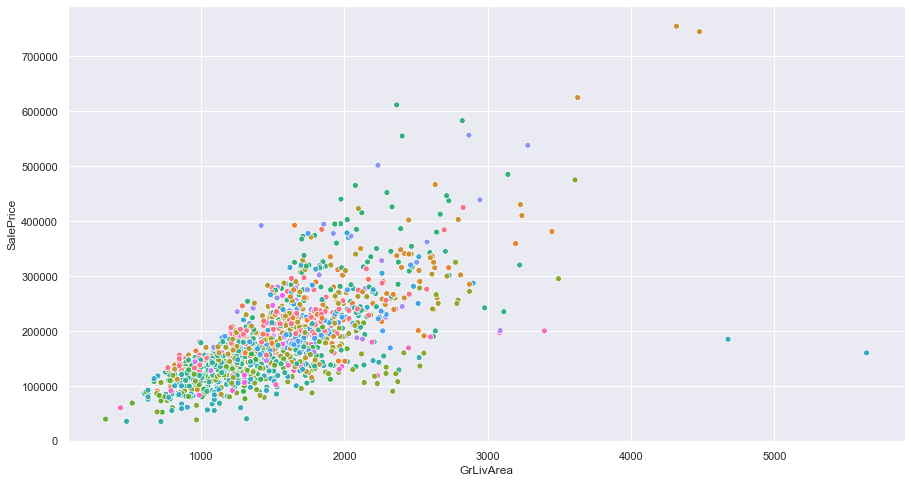

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'], hue = df_train['Neighborhood'], legend = False);

We notice two points out of the "line" which are very od and we want to remove it.

In [11]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<200000)].index)

**TotalArea**

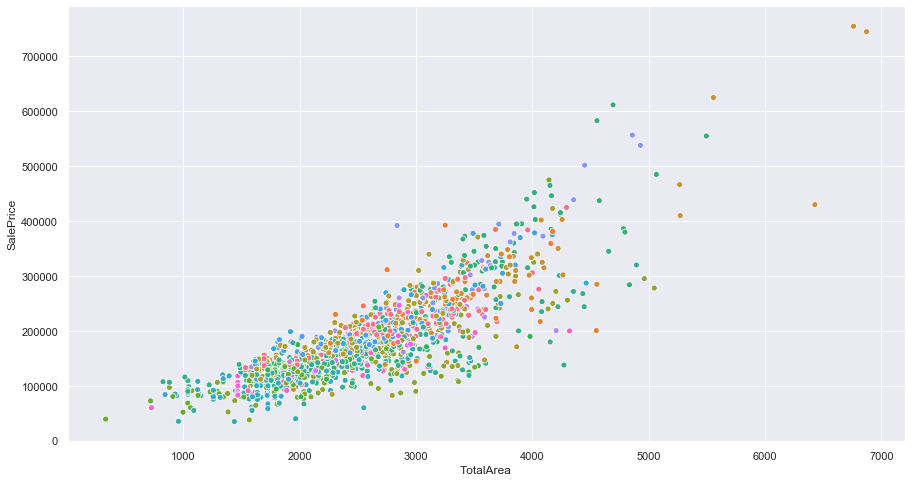

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['TotalArea'], y = df_train['SalePrice'], hue = df_train['Neighborhood'], legend = False);

TotalArea seems fine and looks like a linea-ish relation.

**OverallQual**

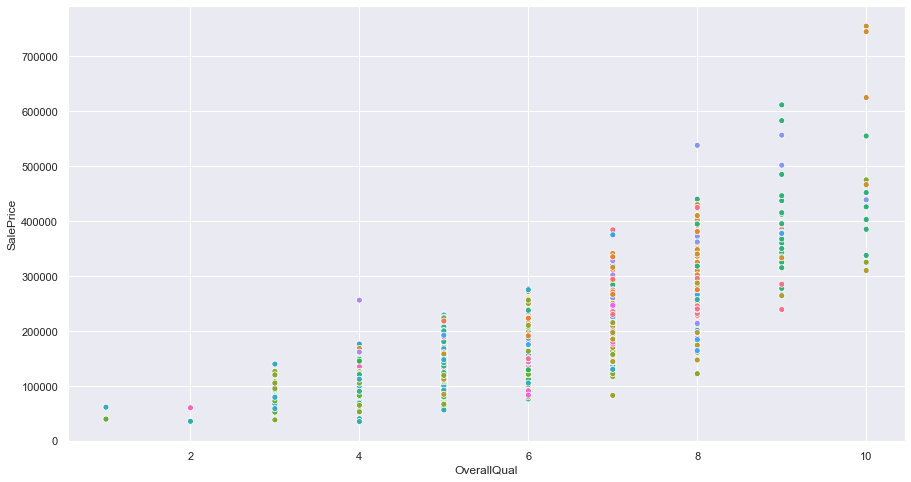

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['OverallQual'], y = df_train['SalePrice'], hue = df_train['Neighborhood'], legend = False);

OverallQual seems fine.

How is our train set now?

In [14]:
len_train = df_train.shape[0]
len_train

1458

**Joining both datasets**

In [15]:
df_concat = pd.concat([df_train, df_test], sort = False)

In [16]:
df_concat.shape

(2917, 79)

In [17]:
df_concat = df_concat.drop("Id", axis = 1)

### LOG TRANSFORM TARGET VARIABLE

The target sale price is very skewed so to normalize it we log the target and it become more robust to the model.

Skew: 2.55


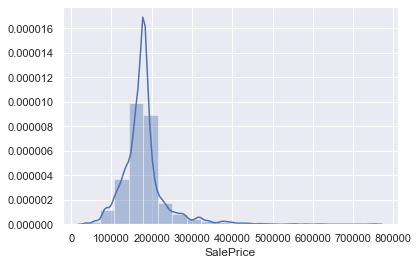

In [18]:
sns.distplot(df_concat['SalePrice'], bins = 20)
print("Skew:", round(df_concat['SalePrice'].skew(),2))

In [19]:
df_concat["SalePrice"] = np.log1p(df_concat["SalePrice"])

Skew: -0.15


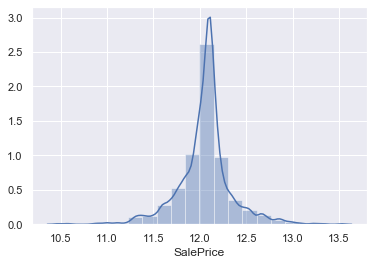

In [20]:
sns.distplot(df_concat['SalePrice'], bins = 20)
print("Skew:", round(df_concat['SalePrice'].skew(),2))

### MISSING VALUES

**Separating continues from categorical features**

In [21]:
continuous = []
categorical = []

for i in df_concat.columns:
    if df_concat[i].dtype == "object":
        categorical.append(i)
    else: continuous.append(i)

print("Continuous:", continuous)
print("-")
print("Categorical:", categorical)

Continuous: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalArea']
-
Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQua

#### Categorical

In [22]:
isna_sum = df_concat[categorical].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_concat[i].isna().sum() !=0]
df_NaN_values = df_concat[NaN_columns]
missing_categorical = pd.DataFrame(df_NaN_values.isna().sum(), columns = ["Missing values"])
missing_categorical.sort_values(["Missing values"], axis = 0, ascending = False)

,Missing values
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420
GarageQual,159
GarageFinish,159
GarageCond,159
GarageType,157
BsmtCond,82


Functional: Home functionality (Assume typical unless deductions are warranted)

- Typ	Typical Functionality
- Min1	Minor Deductions 1
- Min2	Minor Deductions 2
- Mod	Moderate Deductions
- Maj1	Major Deductions 1
- Maj2	Major Deductions 2
- Sev	Severely Damaged
- Sal	Salvage only

In [23]:
df_concat["Functional"].fillna("Typ", inplace = True)

Reading the descriptions of the following features, it is noticeble that an NA means not present so let`s fill the missing with "NA"

In [24]:
for i in ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', "MasVnrType", "MSSubClass", "FireplaceQu"]:
    
    df_concat[i].fillna("NA", inplace = True)

In [25]:
isna_sum = df_concat[categorical].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_concat[i].isna().sum() !=0]
df_NaN_values = df_concat[NaN_columns]
df_NaN_values.isna().sum()

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
Electrical     1
KitchenQual    1
SaleType       1
dtype: int64

Now that we filled most of the missing values let's fill the rest with the most common value of the feature, the mode.

In [26]:
for i in ["MSZoning", "Utilities", "Exterior1st", "Exterior2nd", "Electrical", "KitchenQual", "SaleType"]:
    df_concat[i].fillna(df_concat[i].mode()[0], inplace = True)

#### Continuous

In [27]:
isna_sum = df_concat[continuous].isna().sum()
NaN_columns = [i for i in isna_sum.index if df_concat[i].isna().sum() !=0]
df_NaN_values = df_concat[NaN_columns]
missing_continuous = pd.DataFrame(df_NaN_values.isna().sum(), columns = ["Missing values"])
missing_continuous.sort_values(["Missing values"], axis = 0, ascending = False)

,Missing values
LotFrontage,486
GarageYrBlt,159
MasVnrArea,23
BsmtFullBath,2
BsmtHalfBath,2
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
GarageCars,1
GarageArea,1


The **LotFrontage** is the most critical value to be missing, because it means **"Linear feet of street connected to property"**. Therefore its value is possible very correlated with the price. It makes sense that most of the houses in a Neighborhood have a somewhat similar value for this feature. Hence, to solve this issue we group by neighborhood and fill in missing values by the median of all the neighborhood.

In [28]:
df_concat["LotFrontage"] = df_concat.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

For the same reason of the related features in categorical data, it is noticeble that a missing value means not present so let`s fill the missing with 0.

In [29]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 
            'BsmtHalfBath', "MasVnrArea", "TotalArea"):
    
    df_concat[i].fillna(0, inplace = True)

**Is there still any missing value?**

In [30]:
sum(df_concat.isna().sum())

0

### SKEWED CONTINUOUS FEATURES

In [31]:
big_skew = [feature for feature in continuous if abs(df_concat[feature].skew()) > 0.75]

In [32]:
print("High skewed data:", big_skew)
len(big_skew)

High skewed data: ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalArea']


20

**APPLYING BOX COX TRANSFORMATION TO SKEWED DATA**

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

The parameter lambda (0.15) minimizes the standard deviation of a standardized transformed variable. 

In [33]:
for feature in big_skew:
    df_concat[feature] = boxcox1p(df_concat[feature], 0.40)

### GETTING DUMMIES FOR CATEGORICAL VALUES

In [34]:
df_concat = pd.get_dummies(df_concat)
print(df_concat.shape)

(2917, 301)


In [35]:
df_concat.shape

(2917, 301)

## CORRELATION MATRIX

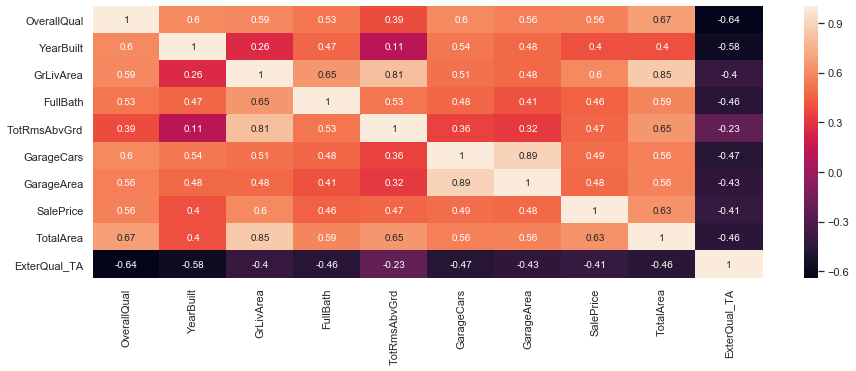

In [36]:
corrmat = df_concat.corr()
high_corr_columns_final = corrmat.index[abs(corrmat["SalePrice"])>0.4]

plt.figure(figsize=(15,5))
g = sns.heatmap(df_concat[high_corr_columns_final].corr(),annot=True)

### SPLITTING THE DATA

In [37]:
len_train

1458

In [38]:
train_set_final = df_concat.iloc[:len_train,:]
test_set_final = df_concat.iloc[len_train:,:]

In [39]:
print(train_set_final.shape)
print(test_set_final.shape)

(1458, 301)
(1459, 301)


# BUILDING THE PREDICTION MODEL

Splitting the train data frame into train and test subsets

In [40]:
X = train_set_final.drop('SalePrice',axis=1)
y = train_set_final[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

Data for prediction and submit

In [41]:
X_submission = test_set_final.drop('SalePrice',axis=1)

Models to test the score

In [42]:
import lightgbm as lgb

In [43]:
modelsFinal = []
modelsFinal.append(('ENet', make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))))
modelsFinal.append(('Lasso', make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))))
modelsFinal.append(('RF',RandomForestRegressor()))
modelsFinal.append(('GB',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)))
modelsFinal.append(("KRR",KernelRidge()))
modelsFinal.append(("Xgb",xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)))
modelsFinal.append(("LGB", lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)))

In [45]:
def compute_models(X, y):
    names = []
    scores = []
    frame = pd.DataFrame()
    
    for name, model in modelsFinal:
        model.fit(X, y)
        prediction = model.predict(X_submission)
        frame[name] = prediction
        scores.append(model.score(X_test,y_test))
        names.append(name)
    
    bla = pd.DataFrame(scores, index = names, columns = ["score"])
    print(bla)
    
    return frame

In [46]:
frame = compute_models(X_train, y_train)

[14:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
   

In [47]:
frame.head()

,ENet,Lasso,RF,GB,KRR,Xgb,LGB
0,11.675174,11.676502,11.768247,11.731262,11.702439,11.736900,11.711090
1,11.927724,11.928032,11.961459,11.995827,12.052659,11.989292,11.988765
2,12.124922,12.124805,12.087400,12.166806,12.147903,12.147769,12.194214
3,12.202135,12.203264,12.155843,12.221538,12.206942,12.183061,12.241119
4,12.141402,12.139968,12.157742,12.137113,12.152978,12.180221,12.159140


It is possible to note that the models build over ENet and Lasso and Xgb have a higher score. So lets create a column with the mean value of the 3 predictions. Mixing models is known to increase accuracy.

In [48]:
frame["mean"] = (frame["ENet"] + frame["Lasso"] + frame["Xgb"] + frame["LGB"] + frame["GB"]+ frame["KRR"])/6

In [49]:
frame.head(10)

,ENet,Lasso,RF,GB,KRR,Xgb,LGB,mean
0,11.675174,11.676502,11.768247,11.731262,11.702439,11.736900,11.711090,11.705561
1,11.927724,11.928032,11.961459,11.995827,12.052659,11.989292,11.988765,11.980383
2,12.124922,12.124805,12.087400,12.166806,12.147903,12.147769,12.194214,12.151070
3,12.202135,12.203264,12.155843,12.221538,12.206942,12.183061,12.241119,12.209676
4,12.141402,12.139968,12.157742,12.137113,12.152978,12.180221,12.159140,12.151804
5,12.047464,12.047365,12.100134,12.042356,12.059403,12.051210,12.043854,12.048609
6,12.065346,12.068854,12.058271,12.084885,12.030502,12.055554,12.011906,12.052841
7,11.990355,11.990263,12.069219,12.009845,12.005180,12.022712,12.004694,12.003842
8,12.185296,12.183091,12.182635,12.080789,12.228227,12.141112,12.109370,12.154648
9,11.679280,11.679413,11.691926,11.733084,11.681263,11.714639,11.718869,11.701091


# SUBMITION

In [50]:
Id = sub_df["Id"].values
predictions_id = list(zip(Id,frame["mean"]))

In [51]:
submission = pd.DataFrame(predictions_id , columns = ["Id", "SalePrice"])

Predicted value in log form

In [52]:
submission.head()

,Id,SalePrice
0,1461,11.705561
1,1462,11.980383
2,1463,12.151070
3,1464,12.209676
4,1465,12.151804


Converting to original format

In [53]:
submission["SalePrice"] = np.expm1(submission["SalePrice"])

In [54]:
submission.head()

,Id,SalePrice
0,1461,121243.130907
1,1462,159592.144195
2,1463,189295.487785
3,1464,200721.048416
4,1465,189434.464782


In [55]:
len(submission)

1459

### SAVING FILE

In [56]:
submission.to_csv('outputs/submission_ensemble.csv',sep=',', encoding='utf-8', index=False)

In [57]:
submission["SalePrice"].isna().sum()

0

# NEURAL NETWORK - TENSORFLOW - KERAS

Importing library

In [60]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *

os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

Checking what is the device available, in our case CPU, as GPU is not available in my pc

In [61]:
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.4.1


In [62]:
from sklearn.preprocessing import MinMaxScaler

All data needs to be scaled to a small range like 0 to 1 for the neural network to work well. Create scalers for the inputs and outputs.

In [63]:
X_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = MinMaxScaler(feature_range=(0, 1))

Scale both the training inputs and outputs

In [64]:
X_scaled_training = X_scaler.fit_transform(X_train)
Y_scaled_training = Y_scaler.fit_transform(y_train)

It's very important that the training and test data are scaled with the same scaler.

In [65]:
X_scaled_testing = X_scaler.transform(X_test)
Y_scaled_testing = Y_scaler.transform(y_test)

Create new pandas DataFrame objects from the scaled data

In [66]:
X_scaled_training_df = pd.DataFrame(X_scaled_training, columns=X_train.columns.values)
Y_scaled_training_df = pd.DataFrame(Y_scaled_training, columns=y_train.columns.values)

X_scaled_test_df = pd.DataFrame(X_scaled_testing, columns=X_test.columns.values)
Y_scaled_test_df = pd.DataFrame(Y_scaled_testing, columns=y_test.columns.values)

In [67]:
# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: SalePrice values were scaled by multiplying by {:.15f} and adding {:.15f}".format(Y_scaler.scale_[0], Y_scaler.min_[0]))

Note: SalePrice values were scaled by multiplying by 0.325287499732745 and adding -3.402595322397670


In [68]:
X_scaled_training_df.shape

(1093, 300)

## BUILDING THE MODEL

In [69]:
model = Sequential()
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_logarithmic_error", optimizer="adam", metrics = 'mse')

In [70]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               90300     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38528     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 137,149
Trainable params: 137,149
Non-trainable params: 0
_________________________________________________________________
None


## TRAINING THE MODEL

In [74]:
model.fit(
    X_scaled_training,
    Y_scaled_training,
    epochs=100,
    shuffle=True,
    verbose=2, validation_data= (X_scaled_testing, Y_scaled_testing)
)

Epoch 1/100
35/35 - 0s - loss: 4.6704e-05 - mse: 1.0995e-04 - val_loss: 9.7950e-04 - val_mse: 0.0021
Epoch 2/100
35/35 - 0s - loss: 5.6424e-05 - mse: 1.8709e-04 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 3/100
35/35 - 0s - loss: 7.1307e-05 - mse: 1.9090e-04 - val_loss: 0.0012 - val_mse: 0.0025
Epoch 4/100
35/35 - 0s - loss: 9.3499e-05 - mse: 2.2932e-04 - val_loss: 0.0010 - val_mse: 0.0022
Epoch 5/100
35/35 - 0s - loss: 9.2244e-05 - mse: 2.1059e-04 - val_loss: 0.0011 - val_mse: 0.0023
Epoch 6/100
35/35 - 0s - loss: 1.6055e-04 - mse: 3.6731e-04 - val_loss: 0.0011 - val_mse: 0.0023
Epoch 7/100
35/35 - 0s - loss: 1.3301e-04 - mse: 3.1102e-04 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 8/100
35/35 - 0s - loss: 1.0653e-04 - mse: 2.3375e-04 - val_loss: 0.0010 - val_mse: 0.0022
Epoch 9/100
35/35 - 0s - loss: 7.8136e-05 - mse: 1.7832e-04 - val_loss: 0.0011 - val_mse: 0.0023
Epoch 10/100
35/35 - 0s - loss: 1.0226e-04 - mse: 2.3753e-04 - val_loss: 0.0011 - val_mse: 0.0023
Epoch 11/100
35/35 - 0s -

Epoch 84/100
35/35 - 0s - loss: 5.4548e-05 - mse: 1.3596e-04 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 85/100
35/35 - 0s - loss: 5.0701e-05 - mse: 1.1784e-04 - val_loss: 0.0010 - val_mse: 0.0022
Epoch 86/100
35/35 - 0s - loss: 5.0304e-05 - mse: 1.1880e-04 - val_loss: 9.8518e-04 - val_mse: 0.0021
Epoch 87/100
35/35 - 0s - loss: 5.7086e-05 - mse: 1.3635e-04 - val_loss: 0.0010 - val_mse: 0.0022
Epoch 88/100
35/35 - 0s - loss: 4.1835e-05 - mse: 9.0664e-05 - val_loss: 9.8269e-04 - val_mse: 0.0021
Epoch 89/100
35/35 - 0s - loss: 4.6134e-05 - mse: 9.6425e-05 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 90/100
35/35 - 0s - loss: 3.5962e-05 - mse: 9.3577e-05 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 91/100
35/35 - 0s - loss: 1.9748e-05 - mse: 6.8930e-05 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 92/100
35/35 - 0s - loss: 1.2434e-05 - mse: 5.5429e-05 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 93/100
35/35 - 0s - loss: 1.5298e-05 - mse: 5.7220e-05 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 94/100

## TESTING THE MODEL

In [75]:
test_error_rate = model.evaluate(X_scaled_testing, Y_scaled_testing, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: [0.0009976800065487623, 0.0020991615019738674]


## PREDICTIONS

In [76]:
X_submissions_scaled = X_scaler.transform(X_submission)

In [77]:
submission_scaled = model.predict(X_submissions_scaled)

SalePrice values were scaled by multiplying by 0.3252874997 and adding -3.402595

In [78]:
submission = Y_scaler.inverse_transform(submission_scaled)

In [79]:
submission

array([[11.732759],
       [11.934484],
       [12.078889],
       ...,
       [11.843159],
       [11.607525],
       [12.16811 ]], dtype=float32)

## SUBMISSION

In [80]:
submission = np.expm1(submission)

In [81]:
Id = sub_df["Id"].values
predictions_id = list(zip(Id,submission))

In [82]:
submission = pd.DataFrame(predictions_id , columns = ["Id", "SalePrice"])

In [83]:
for i in range(len(submission["SalePrice"])):
    submission["SalePrice"][i] = submission["SalePrice"][i][0]

In [84]:
submission

,Id,SalePrice
0,1461,124585.992188
1,1462,152432.46875
2,1463,176113.375
3,1464,193060.84375
4,1465,172070.765625
...,...,...
1454,2915,88167.0625
1455,2916,78272.71875
1456,2917,139128.265625
1457,2918,109920.84375


In [85]:
submission.to_csv('submission_NN.csv',sep=',', encoding='utf-8', index=False)